# Week 4, Part 2

#### Team 6: Alice Friedman, Jun Pan, Stephen (Scott) Jones, and Jeff Littlejohn 

### 1. Choose a corpus of interest.

We chose the Reuters corpus available as part of the `nltk` package. A description of the data is found at https://miguelmalvarez.com/2015/03/20/classifying-reuters-21578-collection-with-python-representing-the-data/:

<p style="margin-left: 40px"><i>"Reuters-21578 is arguably the most commonly used collection for text classification during the last two decades, and it has been used in some of the most influential papers on the field. For instance, Text Categorization with Support Vector Machines: Learning with Many Relevant Features by Thorsten Joachims. This dataset contains structured information about newswire articles that can be assigned to several classes, therefore making this a multi-label problem. It has a highly skewed distribution of documents over categories, where a large proportion of documents belong to few topics."</i></p>

With the corpus used so readily by researchers, we assume its analysis should be fairly straightforward. Below the corpus is loaded and previewed.

In [54]:
import nltk
import nltk.corpus

from nltk.corpus import reuters

reuters.words()

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

The words must be converted to lowercase. The `len` command checks list length.

In [55]:
textlist = reuters.words()

#convert list to lowercase
textlist = [w.lower() for w in textlist if w.isalpha()]

#check length of list
len(textlist)

1327141

In the initial list of words there are 1,327,141 words; no data cleaning has been performed yet.

Below, the number of <i>unique</i> entries are obtained via the `set` command; the length of the `sorted_text_set` indicates the number of unique words in the list. As we clean the list of words we will monitor this number by calculating after each step.

In [56]:
sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['a', 'aa', 'aaa', 'aabex', 'aac', 'aachener', 'aagiy', 'aaica', 'aaix', 'aam']

In [57]:
#check number of unique words before cleaning
len(sorted_text_set)

29173

Punctuation is removed in the code chunk below; `string.punctuation` is used to accomplish this task.

In [58]:
import string
textlist = [''.join(c for c in s if c not in string.punctuation) for s in textlist]

sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['a', 'aa', 'aaa', 'aabex', 'aac', 'aachener', 'aagiy', 'aaica', 'aaix', 'aam']

To ensure that all words are lowercase, `x.lower` again converts to lowercase while the rest of the command removes words that contain at least one numeric character.

In [59]:
#ensure all words are lowercase; remove any words with any digit
textlist = [x.lower() for x in textlist if not any(c.isdigit() for c in x)]

sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['a', 'aa', 'aaa', 'aabex', 'aac', 'aachener', 'aagiy', 'aaica', 'aaix', 'aam']

In [60]:
sorted_text_set[29160:]

['zubedei',
 'zubeidi',
 'zuccherifici',
 'zuckerman',
 'zuheir',
 'zulia',
 'zurich',
 'zuyuan',
 'zverev',
 'zwermann',
 'zy',
 'zzzz',
 'üside']

We set the minimum number of characters to 3 for words in the list.

In [61]:
#remove all single-letter  and two-letter "words"
textlist = [x for x in textlist if (len(x) > 2)]

sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['aaa',
 'aabex',
 'aac',
 'aachener',
 'aagiy',
 'aaica',
 'aaix',
 'aam',
 'aame',
 'aancor']

The code chunk below removes words composed strictly of consonants, checking that each word in the list contains at least one vowel.

In [62]:
#remove all words without at least one vowel
vowel = ['a','e','i','o','u'] 

vowset = set(vowel)
textlist = [word for word in textlist if vowset.intersection(word)]

textlist[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'from',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction']

Stopwords are removed below using the native `nltk` tool `stopwords` in a second list entitled `textlist2`. By removing stopwords in one version of our list (`textlist2`) we can assess which of the two lists most closely fits the Zipf distribution. Do the stopwords help or harm the fit?

In [63]:
from nltk.corpus import stopwords

#remove stopwords, save to another textlist for comparison later in the Zipf distribution plot
stopwords = stopwords.words('english')
textlist2 = [w for w in textlist if w not in stopwords]

sorted_text_set2 = sorted(set(textlist2))

sorted_text_set2[200:210]

['accurate',
 'accurately',
 'accuray',
 'accured',
 'accusation',
 'accusations',
 'accuse',
 'accused',
 'accusing',
 'accustomed']

### 2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).

After preliminary cleaning, removing strings containing integers, limiting the lenth of strings to greater than 2, and removing stopwords in the list, we calculate the number of distinct "words". Using the `set` command omits duplicates from the number.

We did not perform "stemming" as we are not training a topic model. In the interests of analyzing word frequency in alignment with the Zipf distribution we allow the words to exist in their original unaltered state.

In [64]:
len(sorted_text_set2)

27110

There are 27,110 distinct words left in `textlist2`.

We calculate the number of total words left in the list, including duplicates.

In [65]:
len(textlist2)

761405

There are 761,405 words in `textlist2` if we count duplicate entries.

In the code below a data frame is produced and the 10 most frequent words displayed with their frequency. In preparation for the next step, the index is reset as well, with 0 indicating the most frequent word in the list.

In [66]:
import pandas as pd

fdist = nltk.FreqDist(textlist2)    
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Word'
df_fdist.sort_values(['Frequency'], ascending=[False], inplace = True)

#add index number, make word a column
df_fdist.reset_index(level=0, inplace=True)

#print first ten of data frame
df_fdist.head(10)

,Word,Frequency
0,said,25383
1,year,7529
2,net,6989
3,billion,5829
4,loss,5124
5,would,4673
6,company,4670
7,inc,4121
8,bank,3654
9,corp,3399


### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In order to answer this question we begin by calculating the total number of words in `textlist2`.

In [67]:
half_numwords = len(textlist2)
half_numwords

761405

The following code calculates cumulative frequency in a dataframe sorted by word frequency; a subset of this dataframe is created conditionally based on the value of the cumulative frequency column.

In [68]:
df_fdist['Sum'] = df_fdist.Frequency.cumsum()

unique_arehalf = df_fdist[df_fdist['Frequency']<=half_numwords]

unique_arehalf.tail(1).Sum

27109    761405
Name: Sum, dtype: int64

Since the index for the dataframe begins at 0, there are 27,110 unique words that represent approximately half of the 761,405 total words in the corpus.

### 4. Identify the 200 highest frequency words in this corpus.

The code below creates a subset of the data with the 200 most frequently-occurring words; a word cloud is created. Because the index was reset on the dataframe used in the calculations prior, the 200 most frequently-occurring words are simply the first 199 (including the first, most-frequent word in the list with index 0).

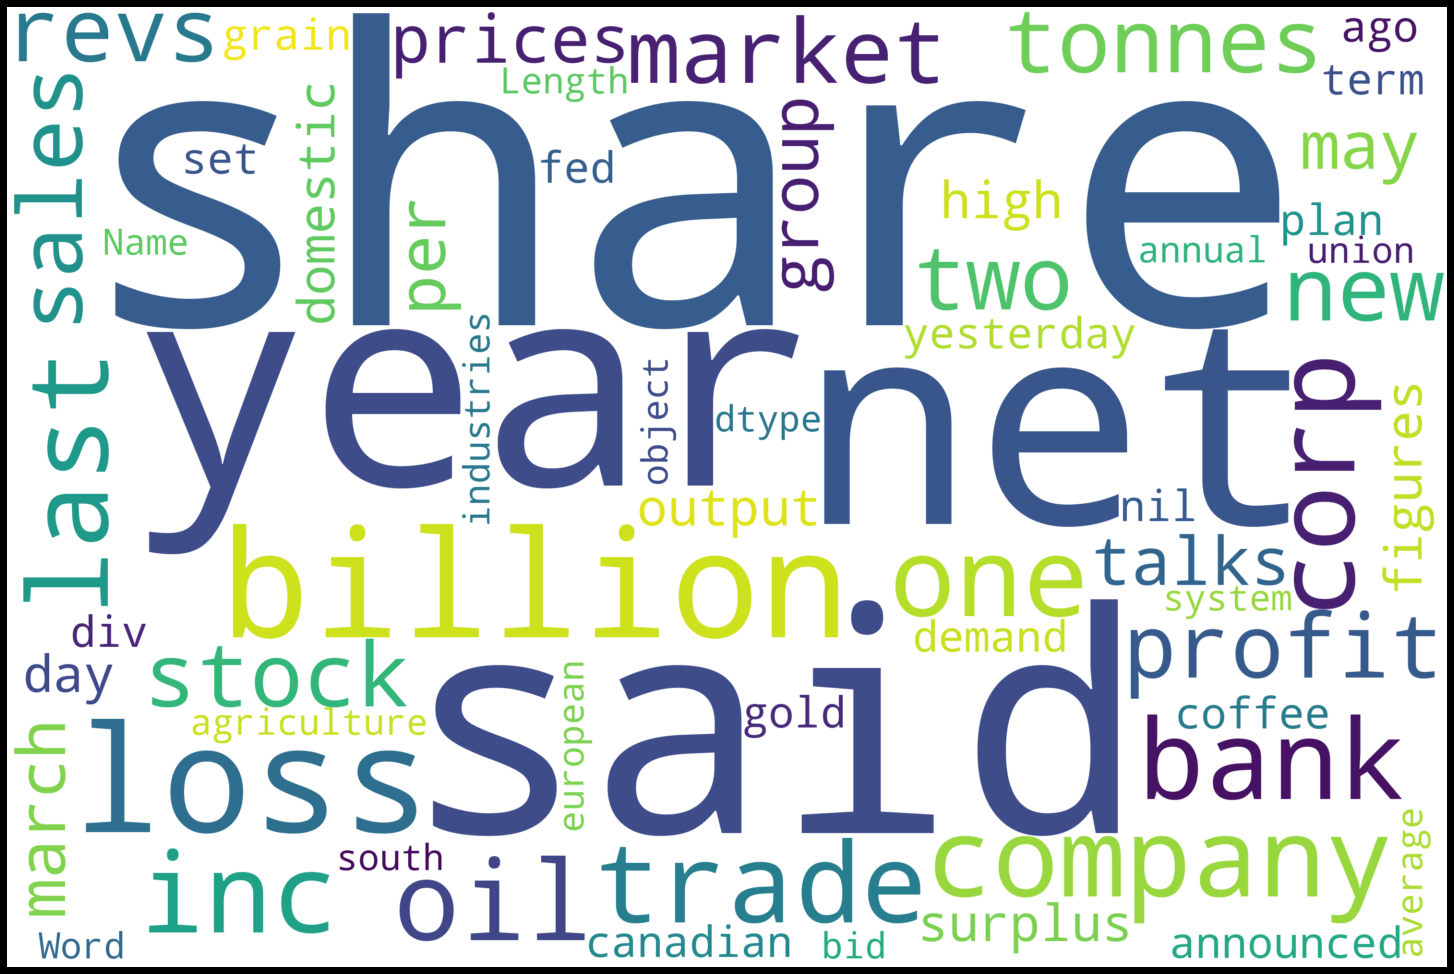

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

high200freq = df_fdist[df_fdist.index<=199]

text = high200freq.Word
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate(str(text))
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Prior calculations have created the `Sum` column which represents the cumulative sum.

In [70]:
high200freq.head(10)

,Word,Frequency,Sum
0,said,25383,25383
1,year,7529,32912
2,net,6989,39901
3,billion,5829,45730
4,loss,5124,50854
5,would,4673,55527
6,company,4670,60197
7,inc,4121,64318
8,bank,3654,67972
9,corp,3399,71371


### 5. Create a graph that shows the relative frequency of these 200 words.

A bar chart plots word frequency. Due to the scope of the plot we've split the result in two stacked plots. In the code below the index is set to display the word associated with its frequency.

In [71]:
high200freq = high200freq.set_index('Word')

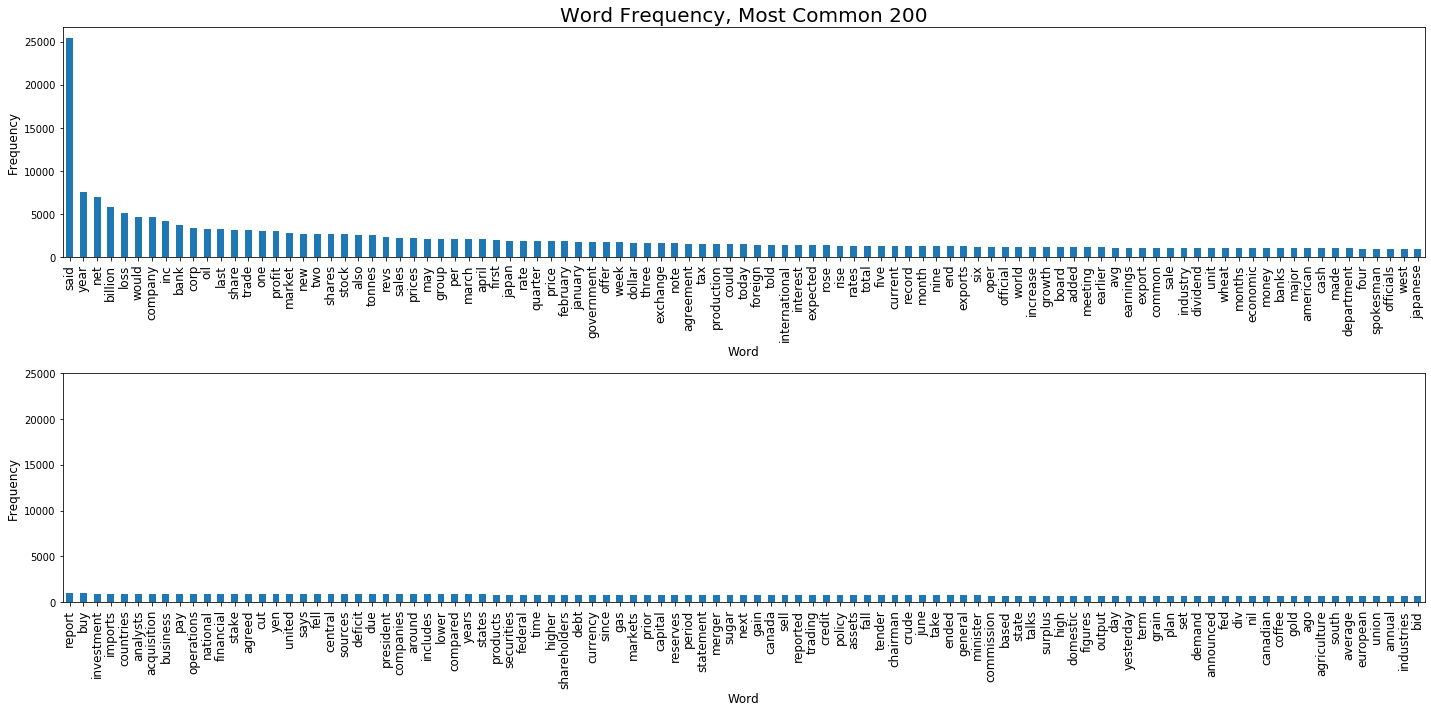

In [72]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(211)
high200freq[0:99].Frequency.plot.bar()
plt.xticks(rotation=90, size=12)
plt.title("Word Frequency, Most Common 200",size=20)
plt.xlabel("Word",size=12)
plt.ylabel("Frequency",size=12)

plt.subplot(212)
high200freq[100:199].Frequency.plot.bar()
plt.xticks(rotation=90, size=12)
plt.xlabel("Word",size=12)
plt.ylabel("Frequency",size=12)
plt.ylim(0,25000) # scale must be set
plt.tight_layout()
plt.show()

### 6. Does the observed relative frequency of these words follow Zipf’s law?  Explain.

Using the code below we compare the word frequency data to the Zipf distribution by plotting the Zipf distribution on the word frequency distribution.

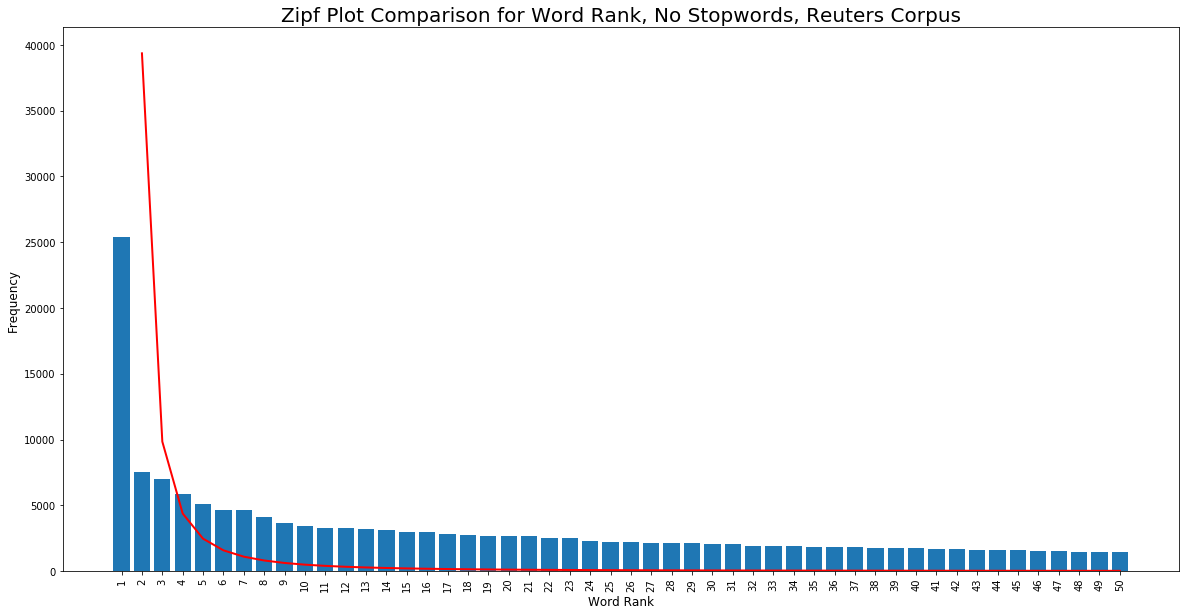

In [73]:
import matplotlib.pyplot as plt
from scipy import special

a = 2. # parameter
s = np.random.zipf(a, 1000)

high200freq = df_fdist[df_fdist.index<=49]

high200freq.index+=1

#make the figure larger
fig = plt.figure(figsize=(20,10))

#Plot bar with values from dict and label with keys
plt.bar(range(len(high200freq)), high200freq.Frequency, align='center')
plt.xticks(range(len(high200freq)), high200freq.index)

#Rotate labels by 90 degrees so you can see them
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#plot zipf distribution
count, bins, ignored = plt.hist(s[s<50], 50, density=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y*max(high200freq.Frequency), linewidth=2, color='r')

plt.title("Zipf Plot Comparison for Word Rank, No Stopwords, Reuters Corpus",size=20)
plt.xlabel("Word Rank",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

The cpmparative word frequency approximates the Zipf distribution, but not closely. Data cleaning, which typically includes stemming, can alter the naturally occurring comparative frequencies in language. We would not expect an altered corpus to follow Zipf's distribution. However, since we preserved stopwords in an alternate corpus, we can compare the distributions.

For the next plot we'll use the original `textlist` which still contains the stopwords that were removed in `textlist2`. With both word frequencies plotted we can see the difference made by the inclusion of stopwords.

In [74]:
fdist = nltk.FreqDist(textlist)    
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Word'
df_fdist.sort_values(['Frequency'], ascending=[False], inplace = True)

#add index number, make word a column
df_fdist.reset_index(level=0, inplace=True)

#print first ten of data frame
df_fdist.head(10)

,Word,Frequency
0,the,69277
1,and,25648
2,said,25383
3,for,13782
4,from,8217
5,that,7540
6,year,7529
7,its,7402
8,net,6989
9,with,6179


Notice stopwords are left in; the most frequent word, "the", occurs over 69,000 times.

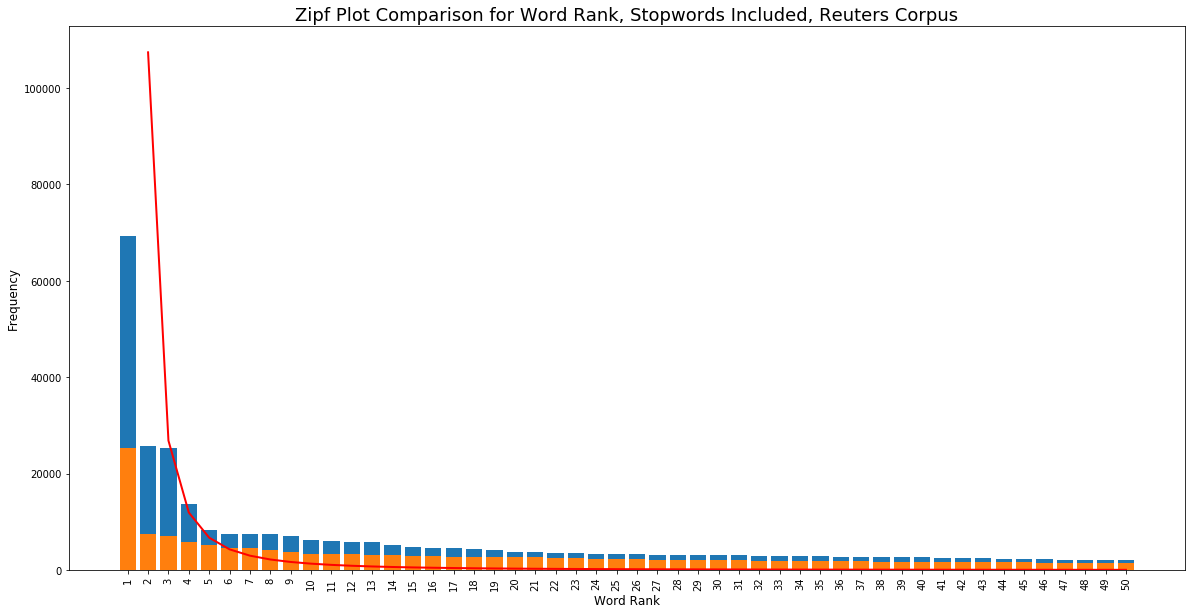

In [75]:
high200freq0 = df_fdist[df_fdist.index<=49]

high200freq0.index+=1

#make the figure larger
fig = plt.figure(figsize=(20,10))

#Plot bar with values from dict and label with keys
plt.bar(range(len(high200freq0)), high200freq0.Frequency, align='center')# textlist1 with stopwords included
plt.bar(range(len(high200freq)), high200freq.Frequency, align='center') # textlist2 with stopwords removed
plt.xticks(range(len(high200freq0)), high200freq0.index)

#Rotate labels by 90 degrees so you can see them
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#plot zipf distribution
count, bins, ignored = plt.hist(s[s<50], 50, density=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y*max(high200freq0.Frequency), linewidth=2, color='r')

plt.title("Zipf Plot Comparison for Word Rank, Stopwords Included, Reuters Corpus",size=18)
plt.xlabel("Word Rank",size=12)
plt.ylabel("Frequency",size=12)

plt.show()

The distribution of unique words approximately follow the Zipf distribution, though cleaning provides an obstacle to a perfect fit. Small words, such as "an", "to", etc. were removed in our cleaning; as they were the most frequent words in the corpus, their removal impacts frequency distribution. The plot above illustrate the difference; the orange indicates frequencies without stopwords, while the blhue indicates the corpus wherein stopwords were included.

While the specific subject matter of the corpora will obviously vary and affect the frequency of particular words, we see that the inclusion of the organic articles in language helps to validate the Zipf distribution. If words composed of less than three letters were permitted to remain the corpus, a closer adherence to the distribution might've been observed.